The purpose of this is to visualize/map the tendencies/biases of the Sample Mean Absolute Deviation vs. the Sample Standard Deviation by varying the way they are calculated; *This is out of personal curiosity and desire to build more intuition on the topic*. 

It is well established that using the $(n-1)$ denominator for Sample SD corrects for the underestimation of the pop. SD from using $n$ alone. The visualizations here attempt to both confirm this, and build a similar conclusion around a modified denominator to unbias the Sample MAD.

In [1]:
import math
import random
import numpy as np
import time
import csv
from matplotlib import pyplot as plt

In [2]:
#Can use any of the populations below for the analysis, this iteration uses male heights.
male_heights = []
female_heights = []
male_weights = []
female_weights = []
count = 0

In [3]:
with open(r"C:\Users\roger\PycharmProjects\stats_experiments\data\weight-height.csv", 'r+') as file:
    reader = csv.reader(file)
    for row in reader:
        if count > 0:
            if row[0] == 'Male':
                male_heights.append(float(row[1]))
                male_weights.append(float(row[2]))
            else:
                female_heights.append(float(row[1]))
                female_weights.append(float(row[2]))
        count += 1

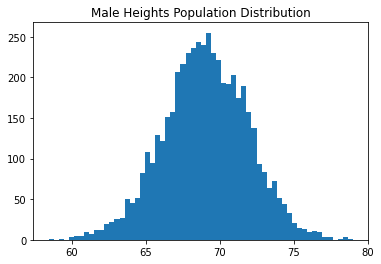

In [4]:
#Ensuring the population data is normally distributed
plt.hist(male_heights, bins=60)
plt.title('Male Heights Population Distribution')
plt.show()

In [5]:
male_heights_mean = np.mean(male_heights)
abs_distance = 0
sqd_distance = 0
for height in male_heights:
    abs_distance += abs(height - male_heights_mean)
    sqd_distance += (height - male_heights_mean) ** 2
popmad = abs_distance / len(male_heights)
popsd = math.sqrt(sqd_distance/len(male_heights))
print('Population Mean', male_heights_mean)
print('Population MAD', popmad)
print('Population SD', popsd)

Population Mean 69.02634590621741
Population MAD 2.2742081876625146
Population SD 2.8630758781195413


In [6]:
#Sample percentage and test range vals are arbitrary
sample_percentage = .004
test_range = 250000

#Creating lists for sample values calculated with 'n' and 'n-1'
sample_madsn = []
sample_sdsn = []
sample_madsone = []
sample_sdsone = []

In [7]:
#value to stop at in shuffled list
limit = int(sample_percentage*len(male_heights))

for x in range(test_range):
    random.shuffle(male_heights)
    male_heights_mean = np.mean(male_heights[:limit])
    abs_distance = 0
    sqd_distance = 0
    for height in male_heights[:limit]:
        abs_distance += abs(height - male_heights_mean)
        sqd_distance += (height - male_heights_mean) ** 2
    
    madn = abs_distance / limit
    madone = abs_distance / (limit-.5)
    sample_madsn.append(madn)
    sample_madsone.append(madone)
    
    sdn = math.sqrt(sqd_distance / limit)
    sdone = math.sqrt(sqd_distance / (limit-1))
    sample_sdsn.append(sdn)
    sample_sdsone.append(sdone)
print('Sample MAD .5', np.mean(sample_madsone))
print('Sample SD 1', np.mean(sample_sdsone))

Sample MAD .5 2.273977519892488
Sample SD 1 2.823303083698831


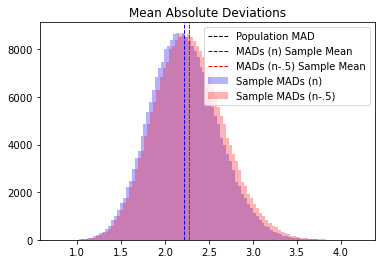

In [21]:
#Mean Absolute Deviations
plt.hist(sample_madsn, bins = 100, color='blue', alpha=.3, label='Sample MADs (n)')
plt.hist(sample_madsone, bins = 100, color='red', alpha=.3, label ='Sample MADs (n-.5)')
plt.axvline(popmad, color='black', linestyle='dashed', linewidth=1, label = 'Population MAD')
plt.axvline(np.mean(sample_madsn), color='blue', linestyle='dashed', linewidth=1, label='MADs (n) Sample Mean')
plt.axvline(np.mean(sample_madsone), color='red', linestyle='dashed', linewidth=1, label='MADs (n-.5) Sample Mean')
plt.title('Mean Absolute Deviations')
plt.legend()
plt.show()

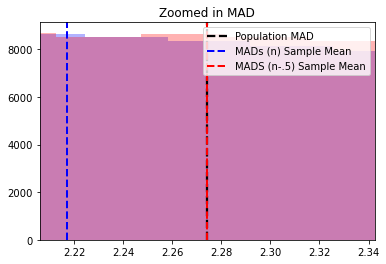

In [22]:
#Zoomed in MAD
plt.hist(sample_madsn, bins = 100, color='blue', alpha=.3)
plt.hist(sample_madsone, bins = 100, color='red', alpha=.3)
plt.axvline(popmad, color='black', linestyle='dashed', linewidth=2.25, label = 'Population MAD')
plt.axvline(np.mean(sample_madsn), color='blue', linestyle='dashed', linewidth=2, label='MADs (n) Sample Mean')
plt.axvline(np.mean(sample_madsone), color='red', linestyle='dashed', linewidth=2, label='MADS (n-.5) Sample Mean')
plt.title('Zoomed in MAD')
plt.legend()
plt.xlim([.97*popmad, 1.03*popmad])
plt.show()

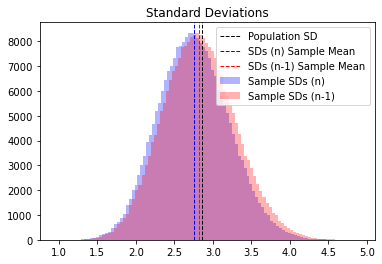

In [16]:
#Standard Deviations
plt.hist(sample_sdsn, bins = 100, color='blue', alpha=.3, label='Sample SDs (n)')
plt.hist(sample_sdsone, bins = 100, color='red', alpha=.3, label='Sample SDs (n-1)')
plt.axvline(popsd, color='black', linestyle='dashed', linewidth=1, label='Population SD')
plt.axvline(np.mean(sample_sdsn), color='blue', linestyle='dashed', linewidth=1, label='SDs (n) Sample Mean')
plt.axvline(np.mean(sample_sdsone), color='red', linestyle='dashed', linewidth=1, label='SDs (n-1) Sample Mean')
plt.title('Standard Deviations')
plt.legend()
plt.show()

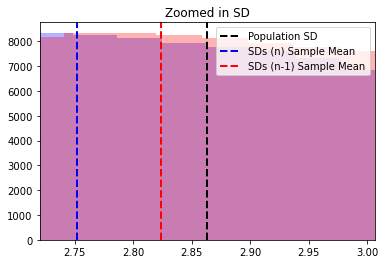

In [19]:
#Zoomed in SD
plt.hist(sample_sdsn, bins = 100, color='blue', alpha=.3)
plt.hist(sample_sdsone, bins = 100, color='red', alpha=.3)
plt.axvline(popsd, color='black', linestyle='dashed', linewidth=2, label='Population SD')
plt.axvline(np.mean(sample_sdsn), color='blue', linestyle='dashed', linewidth=2, label='SDs (n) Sample Mean')
plt.axvline(np.mean(sample_sdsone), color='red', linestyle='dashed', linewidth=2, label='SDs (n-1) Sample Mean')
plt.title('Zoomed in SD')
plt.legend()
plt.xlim([.95*popsd, 1.05*popsd])
plt.show()

As expected, the sample SD estimates closer to the population SD by using $(n-1)$ as opposed to $n$ in the denominator.

Interestingly on MAD, using $n$ estimates the sample MAD closer to the population MAD than $(n-1)$.
However, $n$ alone does seem to underestimate the population MAD to some degree.
After trying out multiple $<1$ constants, using $(n-.5)$ seemed to be the most effective denominator at unbiasing sample MAD, and that is what is plotted in the MAD distribution above.


Below, I will be visualizing the sample SD using both the $n$ and $(n-1)$ denominators, and the MAD using both the $n$ and $(n-.5)$ denominators and each across multiple different sample sizes.

The goal is to show that $-1$ for SD is no better of an adjustment to unbias sample SD as $-.5$ is to unbias sample MAD.

In [23]:
test_range = 250000
percent_loop = [.001, .002, .005, .01, .05, .1, .2, .33, .5, .75, .99]
sdn_error = []
sdone_error = []
madn_error = []
madhalf_error = []
for p in percent_loop:
    limit = int(p*len(male_heights))
    sample_madsn = []
    sample_sdsn = []
    sample_madshalf = []
    sample_sdsone = []
    for x in range(test_range):
        random.shuffle(male_heights)
        male_heights_mean = np.mean(male_heights[:limit])
        abs_distance = 0
        sqd_distance = 0
        for height in male_heights[:limit]:
            abs_distance += abs(height - male_heights_mean)
            sqd_distance += (height - male_heights_mean) ** 2

        madn = abs_distance / limit
        madone = abs_distance / (limit-.5)
        sample_madsn.append(madn)
        sample_madshalf.append(madone)

        sdn = math.sqrt(sqd_distance / limit)
        sdone = math.sqrt(sqd_distance / (limit-1))
        sample_sdsn.append(sdn)
        sample_sdsone.append(sdone)
        
    sample_mads_half_mean = np.mean(sample_madshalf)
    sample_mads_n_mean = np.mean(sample_madsn)
    sample_sds_one_mean = np.mean(sample_sdsone)
    sample_sds_n_mean = np.mean(sample_sdsn)

    madhalf_error.append(sample_mads_half_mean - popmad)
    madn_error.append(sample_mads_n_mean - popmad)
    sdone_error.append(sample_sds_one_mean - popsd)
    sdn_error.append(sample_sds_n_mean - popsd)
    

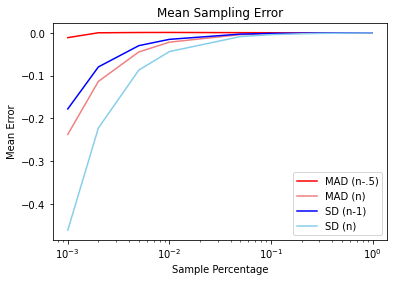

In [24]:
plt.plot(percent_loop, madhalf_error, label='MAD (n-.5)', color='red')
plt.plot(percent_loop, madn_error, label='MAD (n)', color='lightcoral')
plt.plot(percent_loop, sdone_error, label='SD (n-1)', color='blue')
plt.plot(percent_loop, sdn_error, label='SD (n)', color='skyblue')
plt.xscale('log')
plt.title('Mean Sampling Error')
plt.xlabel('Sample Percentage')
plt.ylabel('Mean Error')
plt.legend()
plt.show()

Conclusion:

The $(n-.5)$ denominator for sample MAD is very effective at unbiasing an otherwise largely underestimated MAD from the $n$ denominator, especially at small sample sizes.

At least in this iteration, the $-.5$ modification was even more effective at correcting for the MAD estimation than the $-1$ adjuster is at correcting the SD estimation.